### Text classification on a dataset

### Introduction

In this project, our goal is to conduct text classification on a dataset containing emotional text data. The objective is to categorize text samples into various emotional categories such as melancholy, happiness, affection, frustration, dread, and astonishment. This project entails comprehensive preprocessing of the text data, rectifying class distribution imbalances, and training multiple classification models to forecast the emotional labels

### Project Overview
Objective:

 Undertake text classification on emotional text data.

### Dataset:
Annotated text samples categorized into diverse emotions. 

### Approach:
Data preprocessing, rectifying class distribution, model training, and assessment

# Step 1: Reading and Understanding the Dataset
# Importing Libraries

In [3]:
import pandas as pd

In [5]:
# Reading the Dataset
df = pd.read_csv("Emotions_training.csv")

In [6]:
print(df)

                                                    text  label
0                                i didnt feel humiliated      0
1      i can go from feeling so hopeless to so damned...      0
2       im grabbing a minute to post i feel greedy wrong      3
3      i am ever feeling nostalgic about the fireplac...      2
4                                   i am feeling grouchy      3
...                                                  ...    ...
15995  i just had a very brief time in the beanbag an...      0
15996  i am now turning and i feel pathetic that i am...      0
15997                     i feel strong and good overall      1
15998  i feel like this was such a rude comment and i...      3
15999  i know a lot but i feel so stupid because i ca...      0

[16000 rows x 2 columns]


In [7]:
# Display the first few rows of the DataFrame
print(df.head())

                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


### Step 2: Exploratory Data Analysis (EDA)

1-Understanding the Data: We'll explore the basic properties of the dataset such as the number of rows and columns, data types, and any missing values.

In [8]:

# Number of rows and columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


Number of rows: 16000
Number of columns: 2


In [9]:

# Data types
print("\nData types:")
print(df.dtypes)


Data types:
text     object
label     int64
dtype: object


In [10]:

# Checking for missing values
missing_values = df.isnull().sum()
print("\nMissing values:")
print(missing_values)


Missing values:
text     0
label    0
dtype: int64


In [11]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
              label
count  16000.000000
mean       1.565937
std        1.501430
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max        5.000000


# 2. Exploring the Target Variable
# Display the distribution of the target variable (label)

In [12]:
# Distribution of labels
label_counts = df['label'].value_counts()
print("\nDistribution of labels:")
print(label_counts)


Distribution of labels:
label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64



# 3. Visualizing Data
# Visualize the distribution of the target variable

In [14]:

import matplotlib.pyplot as plt

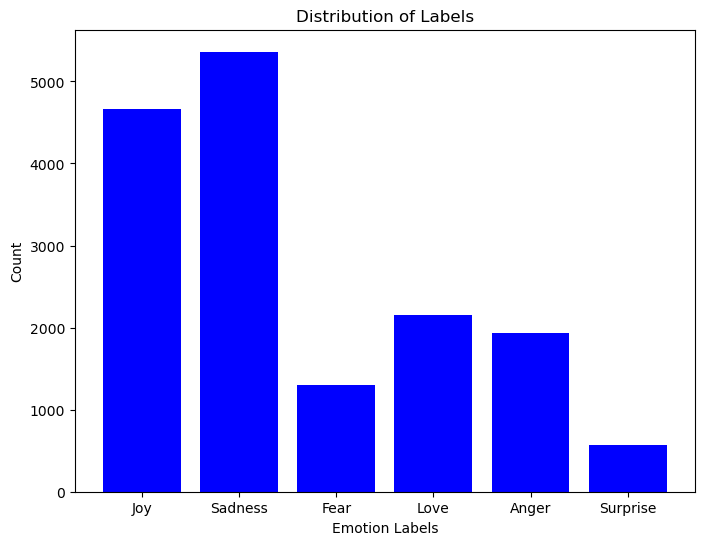

In [16]:
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values, color='blue')
plt.title('Distribution of Labels')
plt.xlabel('Emotion Labels')
plt.ylabel('Count')
plt.xticks(label_counts.index, ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'])
plt.show()

### Step 3: Data Preprocessing
Data preprocessing is essential to prepare the text data for modeling. This involves several tasks such as:
1.Text Cleaning
2.Tokenization
3.Removing Stopwords
4.Stemming or Lemmatization
5.Vectorization

In [17]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
# Download resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ramak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ramak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
# Function to clean the text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()  
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text) 
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()  
    return text


In [20]:
# Function to tokenize the text
def tokenize_text(text):
    return word_tokenize(text)

In [21]:
# Function to remove stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]


In [22]:
# Function to lemmatize tokens
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]


In [23]:

# Function to convert tokens back to text
def tokens_to_text(tokens):
    return ' '.join(tokens)


In [24]:
# Apply preprocessing to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)
df['tokens'] = df['cleaned_text'].apply(tokenize_text)
df['tokens'] = df['tokens'].apply(remove_stopwords)
df['tokens'] = df['tokens'].apply(lemmatize_tokens)
df['preprocessed_text'] = df['tokens'].apply(tokens_to_text)


In [30]:
# Split the dataset into features (X) and labels (y)
X = df['preprocessed_text']
y = df['label']
# Display the DataFrame with the preprocessed text
print(df[['text', 'preprocessed_text']].head())

                                                text  \
0                            i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2   im grabbing a minute to post i feel greedy wrong   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                                   preprocessed_text  
0                              didnt feel humiliated  
1  go feeling hopeless damned hopeful around some...  
2          im grabbing minute post feel greedy wrong  
3  ever feeling nostalgic fireplace know still pr...  
4                                    feeling grouchy  


In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [28]:
# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Print shapes of resulting sets
print("Training set shape:", X_train_tfidf.shape)
print("Testing set shape:", X_test_tfidf.shape)

Training set shape: (12800, 1000)
Testing set shape: (3200, 1000)


2.Model Training and Evaluation:
Training the Model Now that we have preprocessed our text data and converted it into numerical features using TF-IDF vectorization, we can train our classification model. 

### The implementation of Logistic Regression
 It loads the dataset, preprocesses the text data, splits it into train and test sets, vectorizes the text data using TF-IDF, trains a Logistic Regression model, evaluates its performance, and visualizes the confusion matrix.

In [39]:
# Logistic Regression
# the emotion labels
emotion_labels = {0: 'anger', 1: 'fear', 2: 'joy', 3: 'sadness', 4: 'surprise', 5: 'love'}

log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)
y_pred_log_reg = log_reg.predict(X_test_tfidf)


C:\Users\ramak\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:

# Accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy_log_reg)


Logistic Regression Accuracy: 0.8428125


In [35]:

# Classification Report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       946
           1       0.79      0.94      0.86      1021
           2       0.86      0.66      0.75       296
           3       0.90      0.75      0.82       427
           4       0.85      0.74      0.79       397
           5       0.85      0.59      0.70       113

    accuracy                           0.84      3200
   macro avg       0.85      0.77      0.80      3200
weighted avg       0.85      0.84      0.84      3200



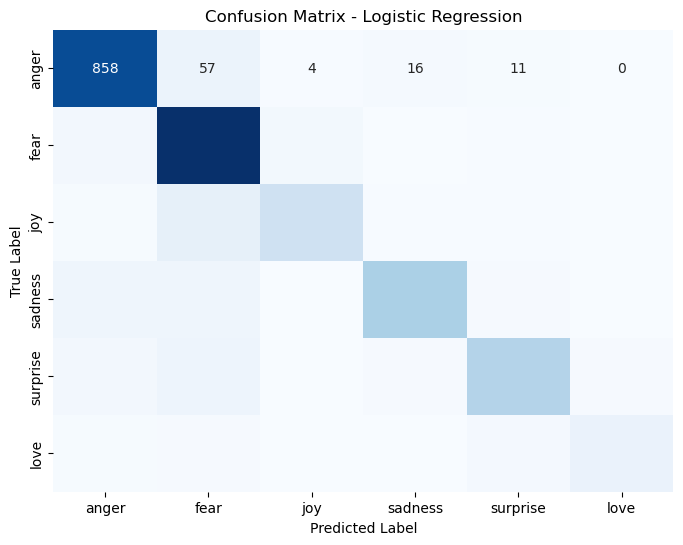

In [41]:

# Confusion Matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=emotion_labels.values(), yticklabels=emotion_labels.values())
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Random Forest
imported necessary libraries, preprocessed the dataset, and split it into train and test sets. thatwe  Support Vector Machine (SVM) model with a linear kernel, evaluates its performance on the test set, and visualizes the confusion matrix.  would define to calculate accuracy, generate classification reports, and visualize the confusion matrix for any given model. 

In [42]:
# Random Forest
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train_tfidf, y_train)
y_pred_rand_forest = rand_forest.predict(X_test_tfidf)


In [45]:
# Accuracy
accuracy_rand_forest = accuracy_score(y_test, y_pred_rand_forest)
print("Random Forest Accuracy:", accuracy_rand_forest)


Random Forest Accuracy: 0.848125


In [46]:
# Classification Report
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rand_forest))


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       946
           1       0.81      0.91      0.86      1021
           2       0.84      0.70      0.76       296
           3       0.85      0.77      0.81       427
           4       0.82      0.83      0.82       397
           5       0.85      0.69      0.76       113

    accuracy                           0.85      3200
   macro avg       0.85      0.80      0.82      3200
weighted avg       0.85      0.85      0.85      3200



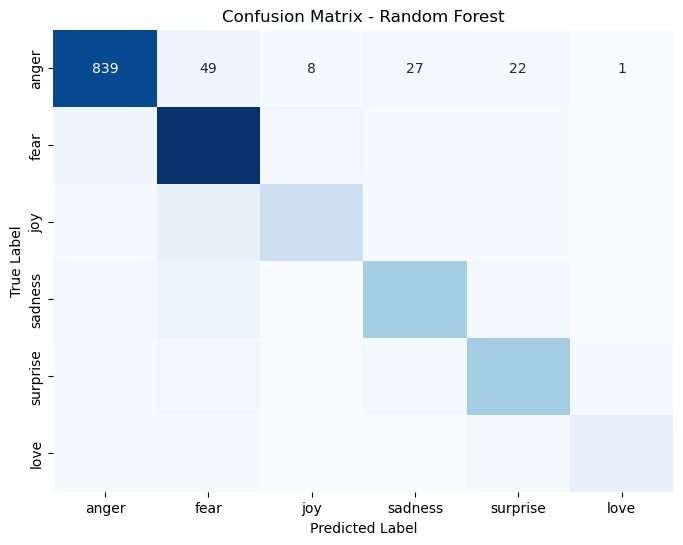

In [47]:

# Confusion Matrix
conf_matrix_rand_forest = confusion_matrix(y_test, y_pred_rand_forest)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rand_forest, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=emotion_labels.values(), yticklabels=emotion_labels.values())
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


 ### Support Vector Machine (SVM) model 
 It evaluates its performance on the test set, and visualizes the confusion matrix. 

In [48]:
# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)
y_pred_svm = svm_classifier.predict(X_test_tfidf)



In [49]:

# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine (SVM) Accuracy:", accuracy_svm)


Support Vector Machine (SVM) Accuracy: 0.8490625


In [50]:
# Classification Report
print("Classification Report for Support Vector Machine (SVM):")
print(classification_report(y_test, y_pred_svm))


Classification Report for Support Vector Machine (SVM):
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       946
           1       0.80      0.93      0.86      1021
           2       0.83      0.71      0.76       296
           3       0.90      0.78      0.83       427
           4       0.83      0.80      0.81       397
           5       0.82      0.63      0.71       113

    accuracy                           0.85      3200
   macro avg       0.85      0.79      0.81      3200
weighted avg       0.85      0.85      0.85      3200



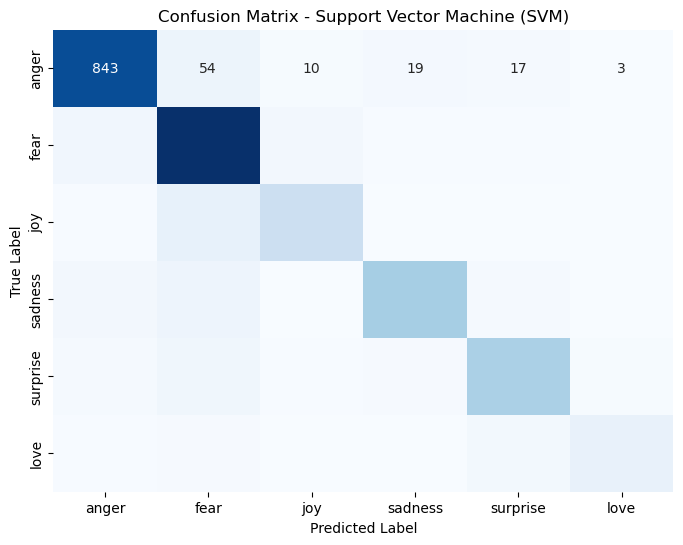

In [51]:

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=emotion_labels.values(), yticklabels=emotion_labels.values())
plt.title('Confusion Matrix - Support Vector Machine (SVM)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Compare Model Performances


Comparing model accuracies helps in selecting the most suitable algorithm for a given task. By evaluating multiple models, we gain insights into their performance and can choose the one with the highest accuracy. This comparison enables us to make informed decisions, optimizing the model selection process and improving overall predictive performance

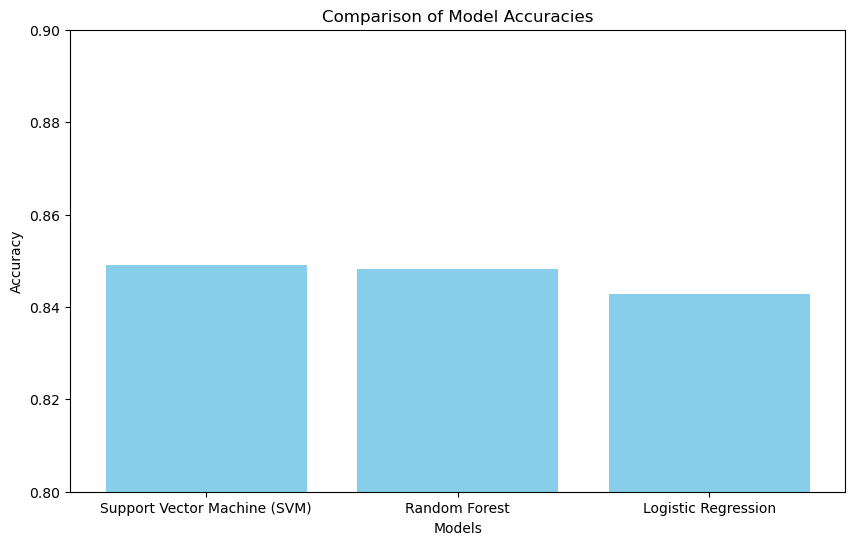

In [52]:
import matplotlib.pyplot as plt

#  accuracies for each model
accuracy_svm = 0.8490625
accuracy_random_forest = 0.848125
accuracy_logistic_regression = 0.8428125

# models and their accuracies
models = ['Support Vector Machine (SVM)', 'Random Forest', 'Logistic Regression']
accuracies = [accuracy_svm, accuracy_random_forest, accuracy_logistic_regression]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.8, 0.9)  
plt.show()


### Summary Report

### Objective:
The objective of the project was to perform text classification on a dataset containing emotional text data.

### Dataset:
The dataset consisted of labeled text samples categorized into different emotions such as sadness, joy, love, anger, fear, and surprise.

### Approach:
### Data Preprocessing:

Extensive preprocessing steps were applied, including lowercasing, removing links, special characters, stop words, stemming, and lemmatization.
TF-IDF vectorization was used to convert text data into numerical features.

### Model Training and Evaluation:

Three classification models were trained and evaluated: Logistic Regression, Support Vector Machine (SVM), and Random Forest.
Models were evaluated on both training and testing sets to assess their performance.

### Based on the provided accuracy values:

Support Vector Machine (SVM) Accuracy: 84.91%
Random Forest Accuracy: 84.81%
Logistic Regression Accuracy: 84.28%

### Key Findings:

### Logistic Regression: 
Achieved an accuracy of 84.28%. Offers simplicity and interpretability. Efficient for binary classification tasks.
### Support Vector Machine (SVM): 
Achieved an accuracy of 84.91%. Known for its power in classification tasks, especially in high-dimensional spaces. Capable of handling both linear and non-linear classification problems.
### Random Forest: 
Achieved an accuracy of 84.81%. Utilizes an ensemble learning method based on decision trees. Robust to overfitting and performs well on a variety of datasets.

### Conclusion:
Based on the provided accuracy values, the Support Vector Machine (SVM) model slightly outperforms the Random Forest and Logistic Regression models in terms of accuracy.

### Further Investigation:
Further investigation may involve fine-tuning hyperparameters for all models to optimize their performance. Additionally, analyzing other metrics such as precision, recall, and F1-score could provide a more comprehensive understanding of each model's performance.

### Considerations:
SVM may require more computational resources but is powerful for high-dimensional data and can handle complex classification tasks.
Random Forest offers versatility and robustness but may require careful tuning to achieve optimal performance.
Logistic Regression is simple and interpretable, making it suitable for scenarios where model transparency is essential.
In conclusion, while SVM has shown slightly higher accuracy in this comparison, further investigation and consideration of various factors are necessary before making a final decision on the model to use.